In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('creditcard.csv')

# Descripción Dataset

- El Dataset contiene transacciones de tarjetas de créditos en Europa en el mes de septiembre del 2013.
- Dada la confidencialidad de los datos, es que no se tiene el background de todas las variables. Las 28 características en las cuales no se presenta información se obtuvieron mediante PCA (Análisis de Componentes Principales), es decir, los datos están transformados.
- Las componentes que no están transformadas son 'Time' y 'Amount'. La primera contiene los segundos transcurridos entre todas las transacciones y la primera transacción del dataset y la segunda es el monto de la transacción. Finalmente, se tiene la clase 'Class', el cual es un 1 si es que es un fraude y 0 si no lo es.


### Vemos el tipo de datos de cada variable y si es que existen valores nulos:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
total= 0
fraudes = 0
for clase in df['Class']:
    if clase == 1:
        fraudes +=1
        total +=1
    else:
        total +=1
print(f'La cantidad de datos fraudulentos presentes es {fraudes} y el porcentaje de fraudes respecto al total es un {round((fraudes/total)*100,3)}%')
# Cantidad de datos no fraudulentos:
no_fraudes=total-fraudes

La cantidad de datos fraudulentos presentes es 492 y el porcentaje de fraudes respecto al total es un 0.173%


Se presentan 492 casos fraudulentos de 284.807 transacciones totales. Es decir, el dataset está totalmente desbalanceado, ya que los fraudes representan solo el 0,173% de todas las transacciones.

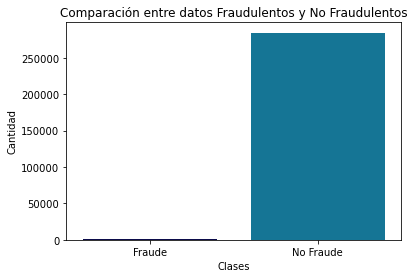

In [4]:
categorias = ['Fraude', 'No Fraude']
valores = [fraudes, no_fraudes]
df_hist = pd.DataFrame({
    'Clases': categorias,
    'Cantidad': valores
})
sns.barplot(x='Clases', y='Cantidad', data=df_hist, palette='ocean')
plt.title('Comparación entre datos Fraudulentos y No Fraudulentos')
plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.show()

### Se analizarán las componentes conocidas:

<AxesSubplot:>

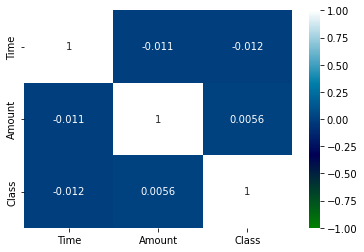

In [5]:
df1 = df[['Time','Amount','Class']]
sns.heatmap(df1.corr(),annot=True,cmap='ocean',vmin=-1,vmax=1)

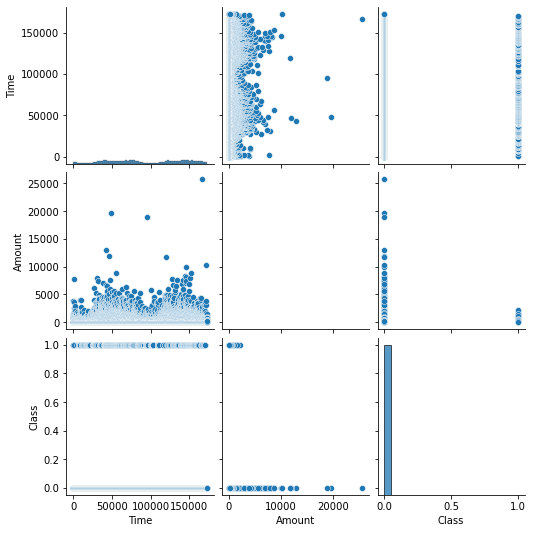

In [6]:
sns.pairplot(df1)

In [13]:
df1_fraud=df1[df1[['Time']]==1]
df1_no_fraud=df1[df1[['Time']]==0]

### Gráfico Box-Plot de Amoun y Time

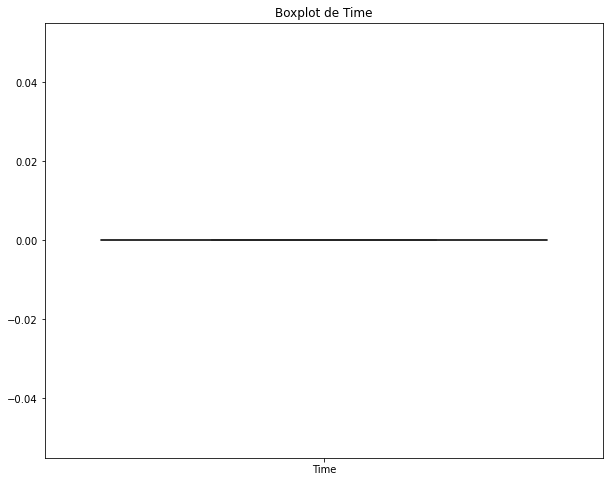

In [18]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df1_no_fraud[['Time']], palette='ocean')
plt.title('Boxplot de Time')
plt.show()

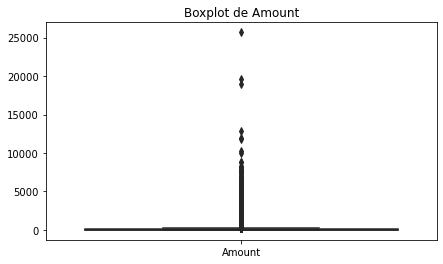

In [19]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df1[['Amount']], palette='ocean')
plt.title('Boxplot de Amount')
plt.show()

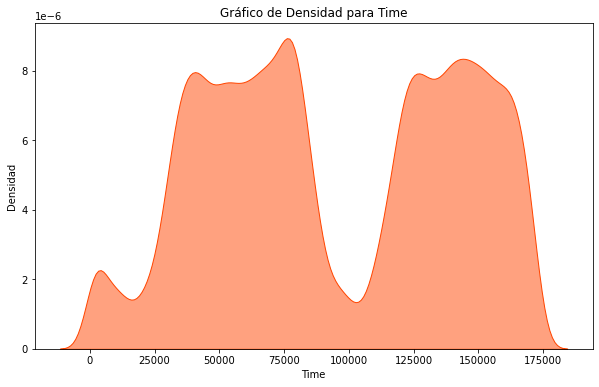

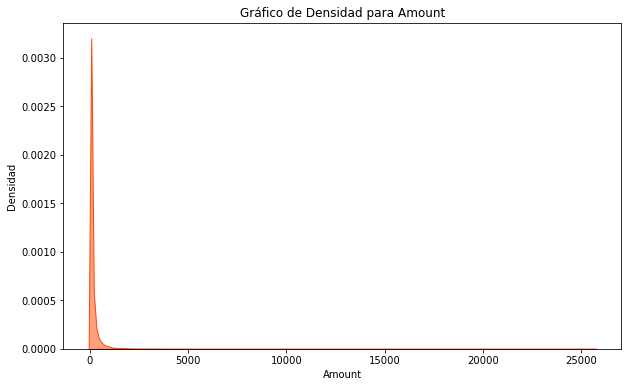

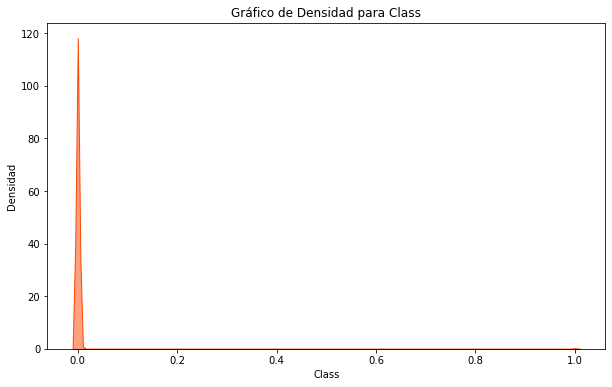

In [27]:
columnas_conocidas = df1.columns.tolist()
for col in columnas_conocidas:
    plt.figure(figsize=(10, 6)) 
    sns.kdeplot(df1[col], fill=True, color='orangered', alpha=0.5)  
    plt.title(f'Gráfico de Densidad para {col}')  
    plt.xlabel(col) 
    plt.ylabel('Densidad') 
    plt.show()  

### Distribuciones de las variables desconocidas:

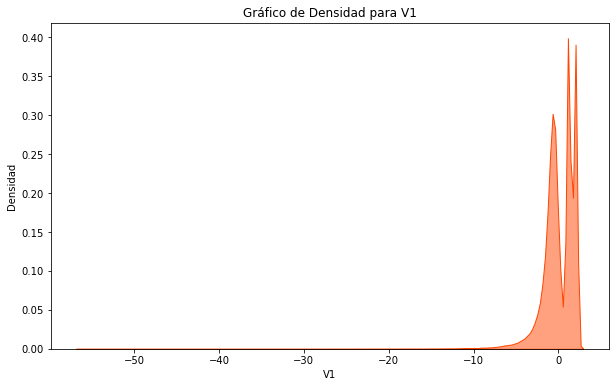

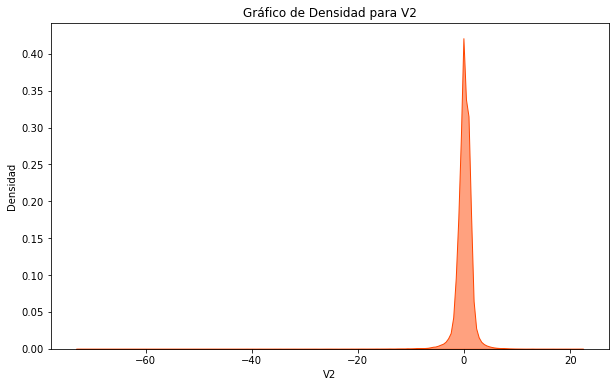

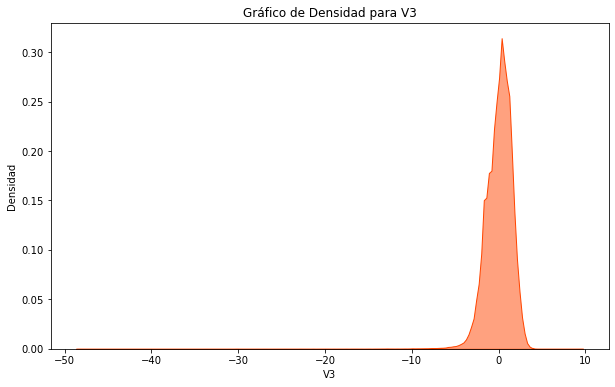

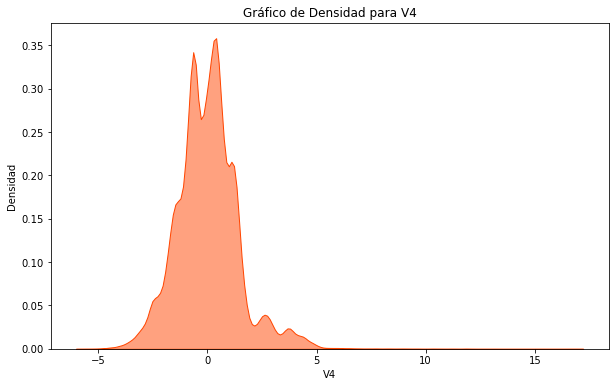

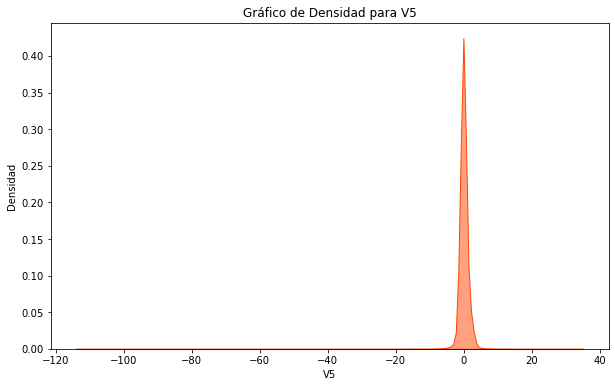

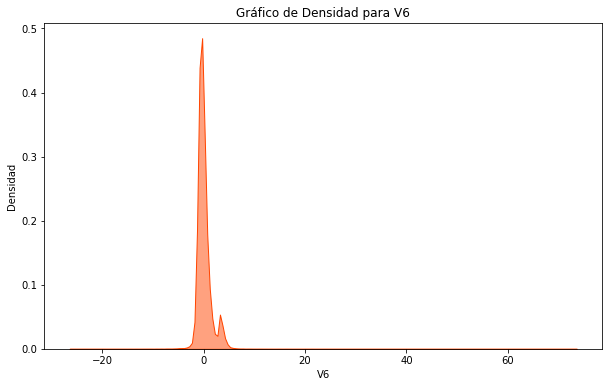

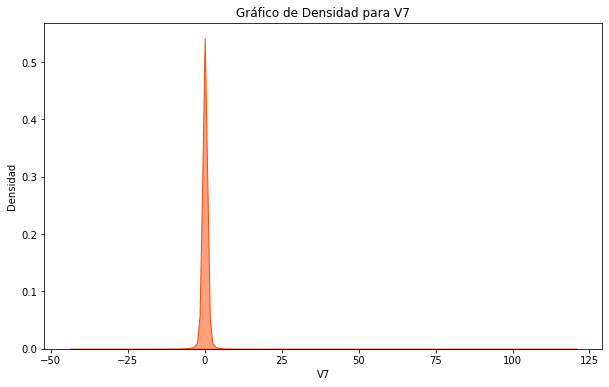

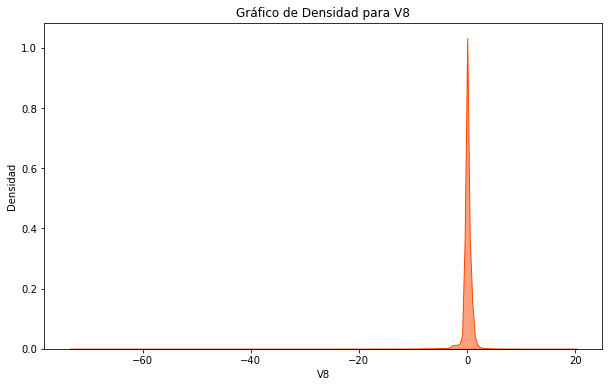

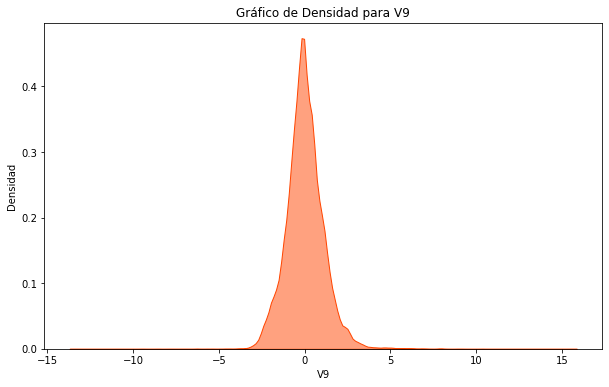

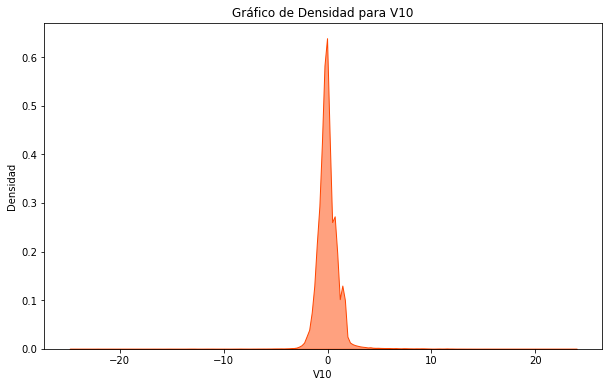

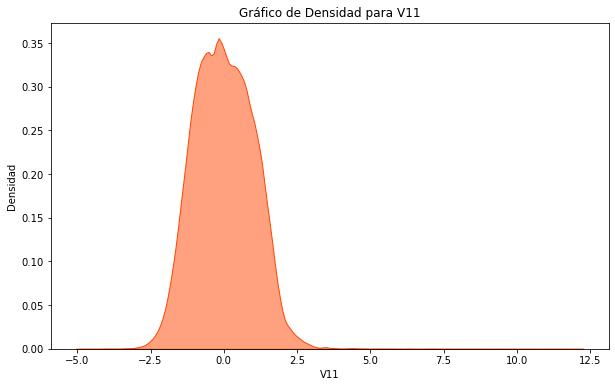

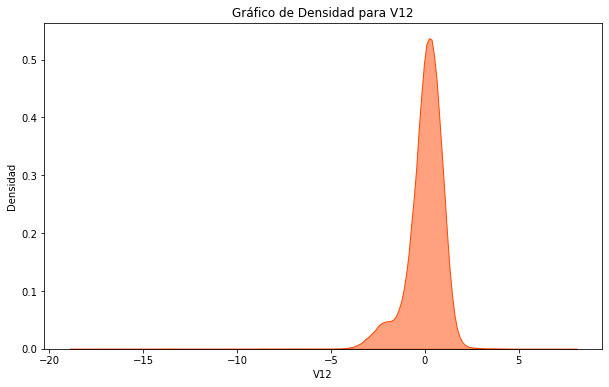

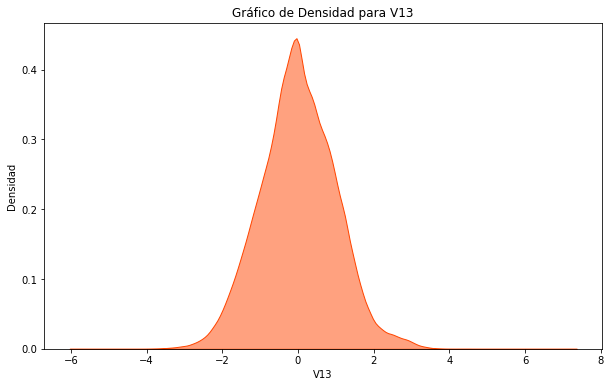

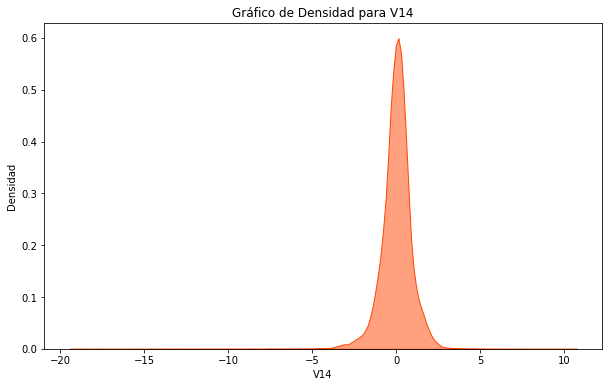

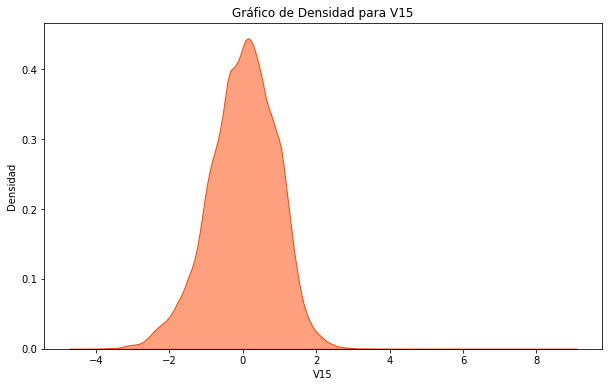

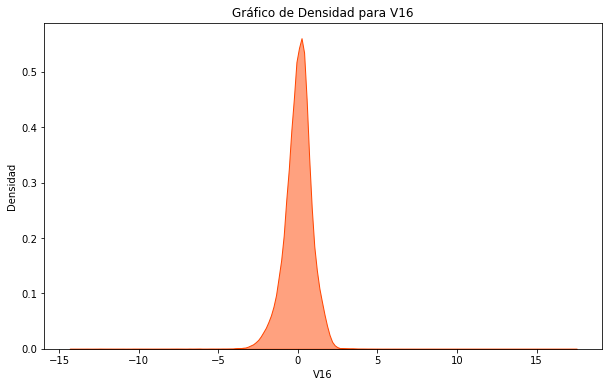

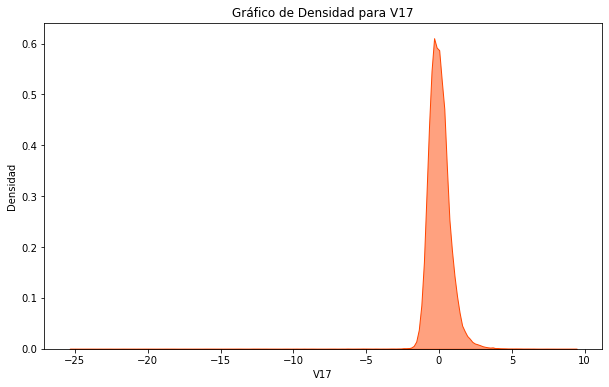

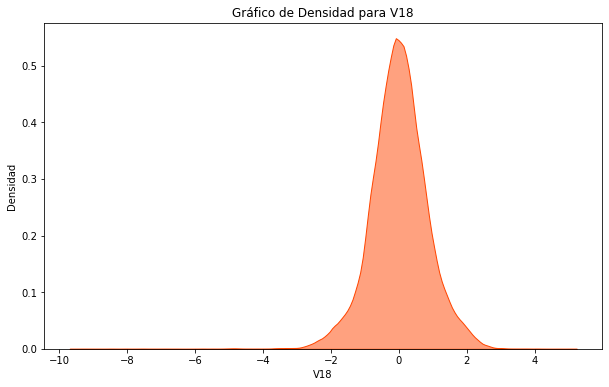

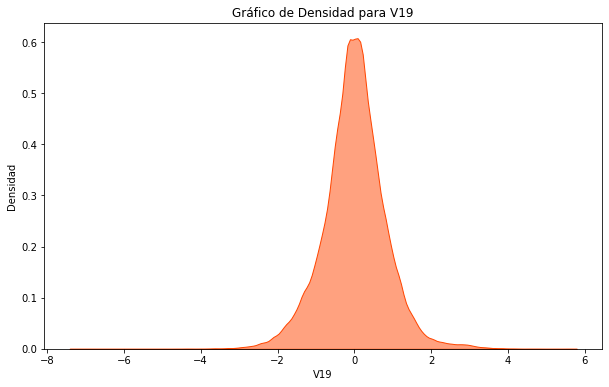

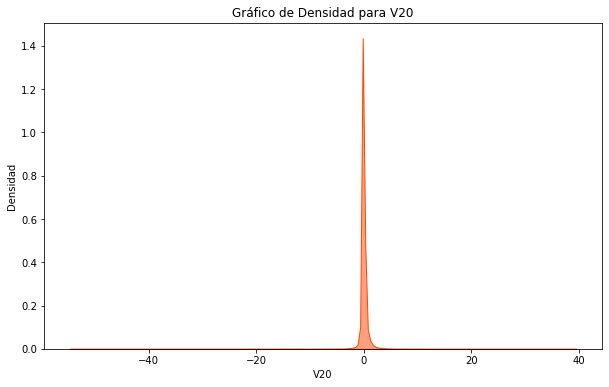

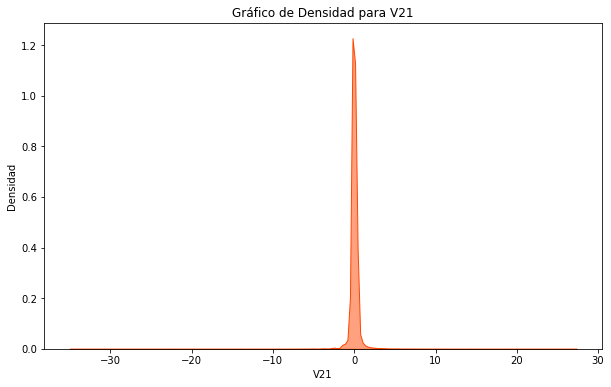

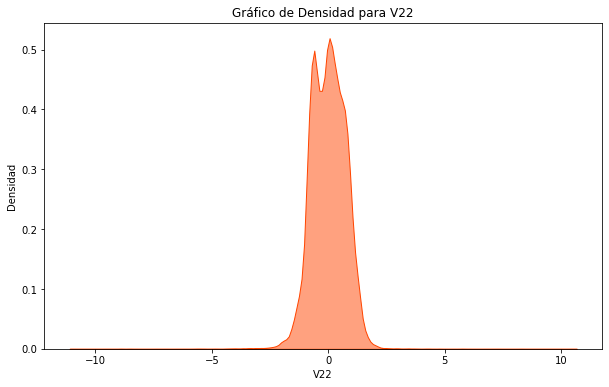

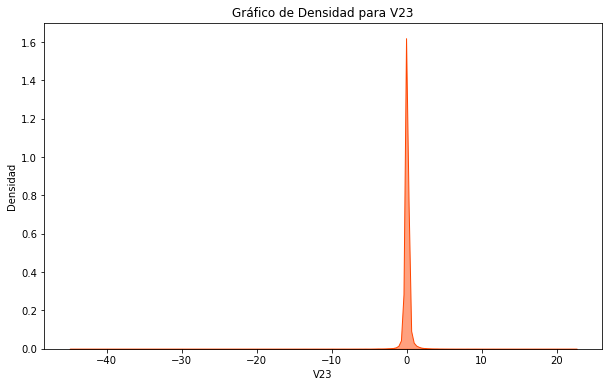

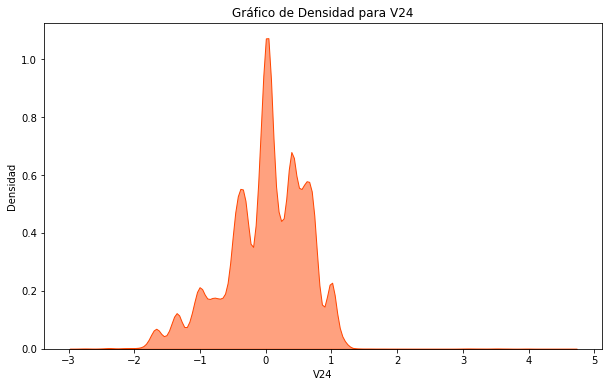

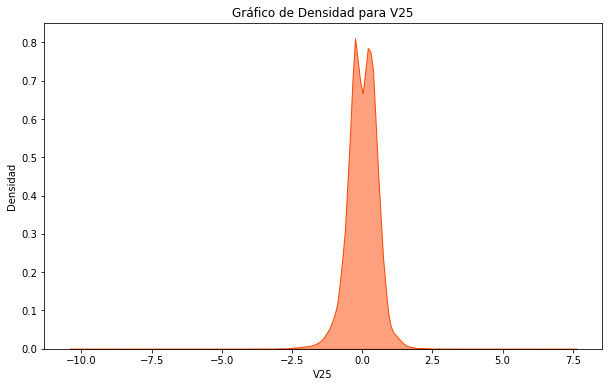

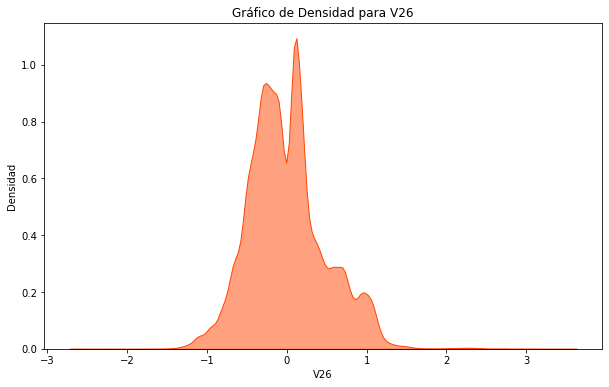

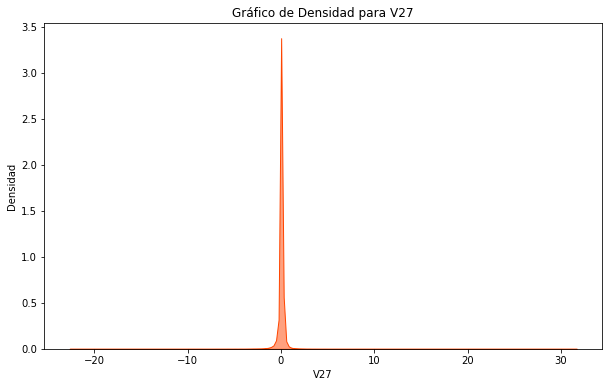

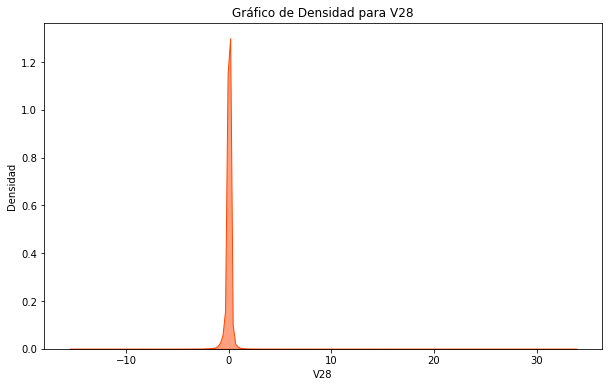

In [25]:
df_desconocido = df.drop(columns=['Amount', 'Time', 'Class'])
columnas = df_desconocido.columns.tolist()
for col in columnas:
    plt.figure(figsize=(10, 6)) 
    sns.kdeplot(df[col], fill=True, color='orangered', alpha=0.5)  
    plt.title(f'Gráfico de Densidad para {col}')  
    plt.xlabel(col) 
    plt.ylabel('Densidad') 
    plt.show()  

## PCA

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

### Se estandarizan los datos:

In [29]:
X = df.drop(['Class'],axis=1)
y = df.Class
std_data = pd.DataFrame(StandardScaler().fit_transform(X),columns = df.columns[:-1])

### Utilizando 26 componentes, se aplica PCA

In [45]:
n=26
sklearn_pca = PCA(n_components=n,random_state=1)
xpca = sklearn_pca.fit_transform(std_data)
varx=sklearn_pca.explained_variance_ratio_

### Se grafica la varianza acumulada

Text(0.5, 0, 'components')

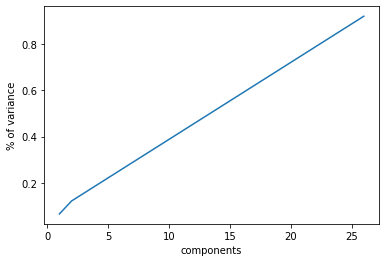

In [46]:
plt.plot(np.arange(1,n+1),varx.cumsum())
plt.ylabel("% of variance")
plt.xlabel("components")

In [47]:
varx.sum()*100

92.13983457746554

Al reducir de 30 a 26 componentes principales, con un 92% de varianza explicada podría ser una buena decisión, ya que se conserva la mayoría de la información relevante en un conjunto de datos más pequeño. Esto simplifica el análisis y mejora la eficiencia computacional sin sacrificar una cantidad significativa de información.

### Definimos un conjunto de entrenamiento con el 20% de los datos:

In [48]:
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(std_data,y,test_size=0.2)

### Además de la métrica, se verificará el tiempo que tarda en calcular las cosas

In [50]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, average_precision_score
import time 

# Random Forest

### Entrenamiento y  cálculo del tiempo de entrenamiento:

In [59]:
rf_model = RandomForestClassifier()
start_time = time.time()
rf_model.fit(X_train, y_train)
elapsed_training_time_rf = time.time() - start_time

### Predicción y cálculo del tiempo de clasificación:

In [60]:
# Predecir y medir el tiempo de clasificación
start_time = time.time()
y_pred_rf = rf_model.predict(X_test)
elapsed_classification_time_rf = time.time() - start_time

### Métricas:

In [61]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
auprc_rf = average_precision_score(y_test, rf_model.predict_proba(X_test)[:, 1])

### Resultados: 

In [62]:
print(f'Random Forest:')
print(f'  AUPRC: {auprc_rf:.4f}')
print(f'  Exactitud: {accuracy_rf:.4f}')
print(f'  Puntuación F1: {f1_rf:.4f}')
print(f'  AUC: {roc_auc_rf:.4f}')
print(f'  Tiempo de entrenamiento (segundos): {elapsed_training_time_rf:.4f}')
print(f'  Tiempo de clasificación (segundos): {elapsed_classification_time_rf:.4f}')

Random Forest:
  AUPRC: 0.8290
  Exactitud: 0.9995
  Puntuación F1: 0.8235
  AUC: 0.9357
  Tiempo de entrenamiento (segundos): 157.5697
  Tiempo de clasificación (segundos): 0.4947


### Curva ROC

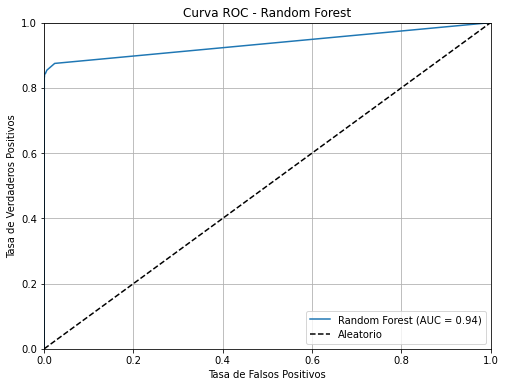

In [63]:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Gradient Boosting

### Entrenamiento y  cálculo del tiempo de entrenamiento:

In [64]:
gb_model = GradientBoostingClassifier()
start_time = time.time()
gb_model.fit(X_train, y_train)
elapsed_training_time_gb = time.time() - start_time

### Predicción y cálculo del tiempo de clasificación:

In [65]:
start_time = time.time()
y_pred_gb = gb_model.predict(X_test)
elapsed_classification_time_gb = time.time() - start_time

### Métricas

In [66]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
auprc_gb = average_precision_score(y_test, gb_model.predict_proba(X_test)[:, 1])

### Resultados

In [67]:
print(f'Gradient Boosting:')
print(f'  AUPRC: {auprc_gb:.4f}')
print(f'  Exactitud: {accuracy_gb:.4f}')
print(f'  Puntuación F1: {f1_gb:.4f}')
print(f'  AUC: {roc_auc_gb:.4f}')
print(f'  Tiempo de entrenamiento (segundos): {elapsed_training_time_gb:.4f}')
print(f'  Tiempo de clasificación (segundos): {elapsed_classification_time_gb:.4f}')

Gradient Boosting:
  AUPRC: 0.6870
  Exactitud: 0.9994
  Puntuación F1: 0.8087
  AUC: 0.8798
  Tiempo de entrenamiento (segundos): 250.3450
  Tiempo de clasificación (segundos): 0.0639


### Curva ROC

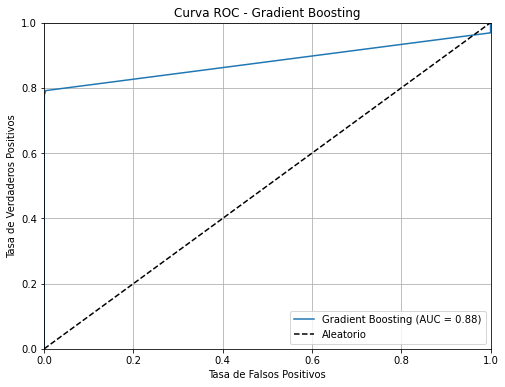

In [68]:
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_gb))
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Gradient Boosting')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Redes Neuronales

### Entrenamiento y  cálculo del tiempo de entrenamiento:

In [69]:
nn_model = MLPClassifier(max_iter=1000) 
start_time = time.time()
nn_model.fit(X_train, y_train)
elapsed_training_time_nn = time.time() - start_time

### Predicción y cálculo del tiempo de clasificación:

In [70]:
start_time = time.time()
y_pred_nn = nn_model.predict(X_test)
elapsed_classification_time_nn = time.time() - start_time

### Métricas

In [71]:
accuracy_nn = accuracy_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, nn_model.predict_proba(X_test)[:, 1])
auprc_nn = average_precision_score(y_test, nn_model.predict_proba(X_test)[:, 1])

### Resultados

In [72]:
print(f'Redes Neuronales:')
print(f'  AUPRC: {auprc_nn:.4f}')
print(f'  Exactitud: {accuracy_nn:.4f}')
print(f'  Puntuación F1: {f1_nn:.4f}')
print(f'  AUC: {roc_auc_nn:.4f}')
print(f'  Tiempo de entrenamiento (segundos): {elapsed_training_time_nn:.4f}')
print(f'  Tiempo de clasificación (segundos): {elapsed_classification_time_nn:.4f}')

Redes Neuronales:
  AUPRC: 0.8176
  Exactitud: 0.9994
  Puntuación F1: 0.8177
  AUC: 0.9626
  Tiempo de entrenamiento (segundos): 26.3555
  Tiempo de clasificación (segundos): 0.0558


### Curva ROC

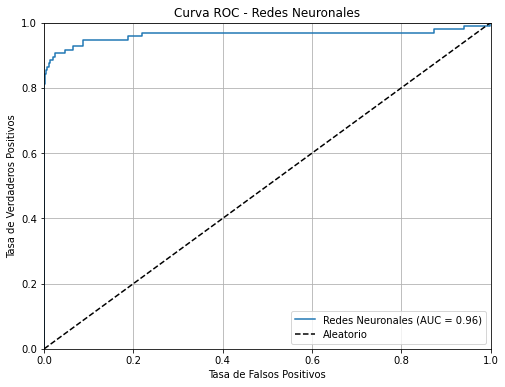

In [73]:
y_proba_nn = nn_model.predict_proba(X_test)[:, 1]
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label='Redes Neuronales (AUC = {:.2f})'.format(roc_auc_nn))
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Redes Neuronales')
plt.legend(loc='lower right')
plt.grid()
plt.show()